# I. premier pas

##chargement
Commencons par télécharger un dataset (ici csv mais télécharger des bases de données SQL ou prendre des ficheir excel est tout aussi facile)

Pour un scrapping sur du html, on regardera plutôt du côté de _beautiful soup_ ou _scrapy_

In [11]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tk3369/seoul-bike-sharing-demand/main/SeoulBikeData.csv', encoding='ISO-8859-1')

In [ ]:
df_titanic = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

Il est aussi possible de créer le dataset à la main

In [9]:
toy = pd.DataFrame({'A':['un',None,'trois']})
print(type(toy))
toy

<class 'pandas.core.frame.DataFrame'>


,A
0,un
1,None
2,trois


et souvent, on le nettoie directement avant de l'utiliser

In [18]:
toy.fillna("deux")

,A
0,un
1,deux
2,trois


## Quelques opérations basiques comme introduction

### Regardons globalement le **dataset**

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Il nous manque des colonnes...

Essayons d'exclure les numerics

In [19]:
df.describe(exclude=float)

,Date,Rented Bike Count,Hour,Humidity(%),Visibility (10m),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,4,2,2
top,04/05/2018,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,58.226256,1436.825799,NaN,NaN,NaN
std,NaN,644.997468,6.922582,20.362413,608.298712,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,27.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,42.000000,940.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,57.000000,1698.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,74.000000,2000.000000,NaN,NaN,NaN


Ce n'est pas suffisant.

Naturellement, numpy fait la différence entre les entiers et les réels. Essayons d'inclure seulement les autres types

In [20]:
df.describe(include=object)

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,04/05/2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


C'est plutôt pas mal. Notons pour plus tard que les date ne sont pas encore gérer correctements

Terminons en regardant les informations global du dataframe

In [22]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Nous avons donc aussi la consommation mémoire du dataframe !

### Les series pandas, Un extension de numpy

In [13]:
df.shape

(8760, 14)

In [15]:
df.Date == df['Date']

0       True
1       True
2       True
3       True
4       True
        ... 
8755    True
8756    True
8757    True
8758    True
8759    True
Name: Date, Length: 8760, dtype: bool

In [25]:
df['Temperature(°C)']*2

0      -10.4
1      -11.0
2      -12.0
3      -12.4
4      -12.0
        ... 
8755     8.4
8756     6.8
8757     5.2
8758     4.2
8759     3.8
Name: Temperature(°C), Length: 8760, dtype: float64

In [26]:
df['Temperature(°C)'].std()

11.944825230027941

In [42]:
df['Temperature(°C)'].unique().size

546

Nous retrouvons bien les possibilités de numpy

Avons nous gardé celle de python?

In [30]:
df['Temperature(°C)'][3:7]

3   -6.2
4   -6.0
5   -6.4
6   -6.6
Name: Temperature(°C), dtype: float64

In [31]:
df['Temperature(°C)'][:4]

0   -5.2
1   -5.5
2   -6.0
3   -6.2
Name: Temperature(°C), dtype: float64

D'accord, mais cette surcouche à un cout, comment retrouver mon bon vieux numpy?

In [33]:
type(df['Temperature(°C)'].values)

numpy.ndarray

D'accord mais alors cela apporte quoi ?

In [34]:
df['Temperature(°C)'].head()

0   -5.2
1   -5.5
2   -6.0
3   -6.2
4   -6.0
Name: Temperature(°C), dtype: float64

In [37]:
df['Temperature(°C)'].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

Ok, mais ca n'est qu'une ligne ou deux python.

Rien de plus avancé ?


In [38]:
(df['Temperature(°C)'] < 0).value_counts()

False    7327
True     1433
Name: Temperature(°C), dtype: int64

**Des dernières fonctions à connaitres sur les séries?**





In [44]:
pd.get_dummies(df.Seasons).head()

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


La fonction ci-dessus permet de transformer les catégories en numérique.

Particulièrement intéressant pour les algorithmes d'apprentissages.

Dans le cas ou les catégories sont dans la même échelles et peuvent être ordonnée 

In [46]:
pd.factorize(df.Seasons)

(array([0, 0, 0, ..., 3, 3, 3]),
 Index(['Winter', 'Spring', 'Summer', 'Autumn'], dtype='object'))

## Les selections avancées

Nous pouvons faire des selection avancées comme le SQL

In [54]:
df[df.Seasons.isin(['Winter','Summer'])][['Rainfall(mm)','Holiday']].drop_duplicates().head()

,Rainfall(mm),Holiday
0,0.0,No Holiday
51,0.5,No Holiday
54,1.0,No Holiday
57,2.5,No Holiday
78,0.1,No Holiday


peut être un peu moins avancées ci-après

la fonction ___iloc___ permet de voir le dataframe comme un tableaux numpy (ou python)

In [55]:
df.iloc[0:5,6:9]

,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,2000,-17.6,0.0
1,2000,-17.6,0.0
2,2000,-17.7,0.0
3,2000,-17.6,0.0
4,2000,-18.6,0.0


la fonction ___loc___ permet de faire un filtrage par pattern

 (filtre par valeur pour la première partie et nom des colonne pour la deuxième)

In [58]:
df.loc[df['Temperature(°C)'] > 0, 'Hour' : 'Seasons'].head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
12,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter
13,13,2.4,25,1.6,2000,-15.6,1.16,0.0,0.0,Winter
14,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter
15,15,2.1,36,3.2,2000,-11.4,0.54,0.0,0.0,Winter
16,16,1.2,54,4.2,793,-7.0,0.24,0.0,0.0,Winter


In [60]:
df.loc[df['Temperature(°C)'] > 0 | (df.Seasons == 'Winter'), 'Hour' : 'Seasons'].head(2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
12,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter
13,13,2.4,25,1.6,2000,-15.6,1.16,0.0,0.0,Winter


## Des statistiques

Commenons par des notions de répartition

In [62]:
pd.crosstab(df['Seasons'],df['Holiday'],normalize='index')

Holiday,Holiday,No Holiday
Seasons,,
Autumn,0.054945,0.945055
Spring,0.032609,0.967391
Summer,0.021739,0.978261
Winter,0.088889,0.911111


In [63]:
pd.crosstab(df['Holiday'],df['Seasons'],normalize='index')

Seasons,Autumn,Spring,Summer,Winter
Holiday,,,,
Holiday,0.277778,0.166667,0.111111,0.444444
No Holiday,0.247839,0.256484,0.259366,0.236311


Regardons l'incontournable correlation

In [66]:
corr = df.corr()
abs(corr).style.background_gradient(cmap='coolwarm')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,0.199780,0.121108,0.199280,0.379788,0.261837,0.123074,0.141804
Hour,0.410257,1.000000,0.124114,0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,0.036252,0.034794,0.912798,0.353505,0.050282,0.218405
Humidity(%),0.199780,0.241644,0.159371,1.000000,0.336683,0.543090,0.536894,0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,0.036252,0.336683,1.000000,0.171507,0.176486,0.332274,0.019674,0.003554
Visibility (10m),0.199280,0.098753,0.034794,0.543090,0.171507,1.000000,0.176630,0.149738,0.167629,0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,0.176486,0.176630,1.000000,0.094381,0.125597,0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,0.461919,0.332274,0.149738,0.094381,1.000000,0.074290,0.072301
Rainfall(mm),0.123074,0.008715,0.050282,0.236397,0.019674,0.167629,0.125597,0.074290,1.000000,0.008500
Snowfall (cm),0.141804,0.021516,0.218405,0.108183,0.003554,0.121695,0.150887,0.072301,0.008500,1.000000


il est aussi possible de faire ces propres operations

In [67]:
import numpy as np
df.agg(np.std)

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

# II. Feature crafting

## Series temporelles

### les bases

Il est temps de parser la date de notre dataset

In [81]:
pd.to_datetime(df.Date).head(2)

0   2017-01-12
1   2017-01-12
Name: Date, dtype: datetime64[ns]

Remarquez le type Date(datetimen64). Une autre solution aurait été de l'indiquer à la lecture du fichier

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/tk3369/seoul-bike-sharing-demand/main/SeoulBikeData.csv', encoding='ISO-8859-1', parse_dates = ['Date'])
df['Date'].head(2)

0   2017-01-12
1   2017-01-12
Name: Date, dtype: datetime64[ns]

Mes les séries temporelles peuvent aussi être réalisé à la main

In [70]:
dti = pd.date_range('2021-03-30', periods=4, freq='D')
dti

DatetimeIndex(['2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02'], dtype='datetime64[ns]', freq='D')

La notion de delta dans les dates est géré dans pandas 

In [71]:
dti[-1].day_name()

'Friday'

In [73]:
(dti[-1]+ pd.Timedelta('1 day')).day_name()

'Saturday'

Il est aussi possible de filtrer par les dates, lorsque ces dernières sont les indexes

In [90]:
ts = df.set_index('Date')
ts['2017-01-12':'2017-02-12'].head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


### le Fenêtrage

In [75]:
s =pd.Series(range(5),index=pd.date_range('2020-01-01',periods=5, freq='1D'))
s

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
Freq: D, dtype: int64

In [76]:
s.rolling(window='2D').sum()

2020-01-01    0.0
2020-01-02    1.0
2020-01-03    3.0
2020-01-04    5.0
2020-01-05    7.0
Freq: D, dtype: float64

### Interpolations

In [91]:
dr = pd.date_range("21/1/2021",periods=5,freq=5* pd.offsets.BDay())
ts = pd.Series(np.random.randn(5),index=dr)
ts

2021-01-21    0.034627
2021-01-28   -1.908067
2021-02-04   -1.749638
2021-02-11   -1.300411
2021-02-18    0.299953
Freq: 5B, dtype: float64

Nous avons créer une série temporelle sur 5 jours mais prenant en compte les week ends

Quand nous passons à chaque journée, il y a des trous dans la données

In [93]:
ts.asfreq(pd.offsets.BDay())[0:6]

2021-01-21    0.034627
2021-01-22         NaN
2021-01-25         NaN
2021-01-26         NaN
2021-01-27         NaN
2021-01-28   -1.908067
Freq: B, dtype: float64

In [94]:
ts.asfreq(pd.offsets.BDay(),method='nearest')[0:6]

2021-01-21    0.034627
2021-01-22    0.034627
2021-01-25   -1.908067
2021-01-26   -1.908067
2021-01-27   -1.908067
2021-01-28   -1.908067
Freq: B, dtype: float64

Cette méthode rempli notre donnée avec la valeur la plus proche. C'est un début mais les sauts restent présent.

Il existe une méthode pour compléter plus itnelligemment les valeurs (simple formule linéaire)

In [95]:
ts.asfreq(pd.offsets.BDay()).interpolate()[:6]

2021-01-21    0.034627
2021-01-22   -0.353912
2021-01-25   -0.742450
2021-01-26   -1.130989
2021-01-27   -1.519528
2021-01-28   -1.908067
Freq: B, dtype: float64

## Enrichissement et le 'split-combine'

In [98]:
df['T kelvin'] = (df['Temperature(°C)'].subtract(32)) *5 /9
df[['T kelvin','Temperature(°C)']].head(2)

,T kelvin,Temperature(°C)
0,-20.666667,-5.2
1,-20.833333,-5.5


In [101]:
df['isFreezing'] = (df['Temperature(°C)'] < 0).astype('int')
df[['isFreezing','Temperature(°C)']].head(2)

,isFreezing,Temperature(°C)
0,1,-5.2
1,1,-5.5


-------
Jouons avec les groupements de données !

Créeons un datasets de démonstrations à taille humaine

In [104]:
group_df = pd.DataFrame(
    {
        'A' : ["foo","bar","foo","bar","foo","bar","foo","foo"],
        'B' : ["one","one","two","three", "two","two","one","three"],
        'C' :np.random.randn(8),
        'D' :np.random.randn(8)
    }

) 

Commençons les tests

In [106]:
group_df.groupby(["A","B"])

Il y a donc un nouvel objet de type "dataframe groupé"

In [107]:
group_df.groupby(["A","B"]).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

Mais nous retrouvons bien nos dataframe après opération. Avec des indexes correspodants aux valeurs de groupements

In [108]:
group_df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.801665 -0.107474
    three  1.082546 -1.571654
    two   -1.229785  1.677832
foo one   -1.126630  0.184807
    three -0.162649 -3.892291
    two   -2.427666  0.796130

Il est aussi possible de définir les groupement par les indexes

In [109]:
group_df.set_index(['A','B']).groupby(level=0).sum()

,C,D
A,,
bar,0.654427,-0.001297
foo,-3.716945,-2.911354


ci-dessus nous avons deux niveau d'index mais ne prenons que le premier niveau pour le calcul de groupements

Mais il est possible de changer cela (et d'appeler l'indetifiant plutôt que le niveau)

In [110]:
group_df.set_index(['A','B']).groupby('B').sum()

,C,D
B,,
one,-0.324964,0.077333
three,0.919897,-5.463945
two,-3.657451,2.473962


Et si nous souhaitons selectionner un groupe particulier par les valeurs ?

In [114]:
group_df.groupby(['A','B']).get_group(("bar","one"))

,A,B,C,D
1,bar,one,0.801665,-0.107474


Naturellement, il est possible d'utiliser les fonctions d'aggrégation avec les groupes

In [115]:
group_df.groupby(['A','B']).agg(np.sum)

C         D
A   B                        
bar one    0.801665 -0.107474
    three  1.082546 -1.571654
    two   -1.229785  1.677832
foo one   -1.126630  0.184807
    three -0.162649 -3.892291
    two   -2.427666  0.796130

Nou pouvons faire l'équivalent d'une véritable requpête SQL complexe

```SQL
select 
  sum_c
from ( 
  select
    sum(C) as sum_c,sum(D),mean(C),mean(D),stddev(C),stddev(D)
  from group_df
  group by A,B
) 
where
  A = 'bar' and B = 'one'
```

In [119]:
group_df.groupby(['A','B']).agg({np.sum,np.mean,np.std})[('C','sum')].loc[("bar",'one')]

0.801665484999152

Enfin la notion de pivot permet de transformer les valeurs d'une colonnes en colonnes

In [117]:
group_df.pivot(columns='B',values='D')

B,one,three,two
0,-1.249405,NaN,NaN
1,-0.107474,NaN,NaN
2,NaN,NaN,0.679084
3,NaN,-1.571654,NaN
4,NaN,NaN,0.117046
5,NaN,NaN,1.677832
6,1.434212,NaN,NaN
7,NaN,-3.892291,NaN


Les valeurs nulles étant là où nous n'avons pas de données.

Même si cela peut être une mauvaise pratique complétons cette données

In [120]:
group_df.pivot(columns='B',values='D').interpolate()

B,one,three,two
0,-1.249405,NaN,NaN
1,-0.107474,NaN,NaN
2,0.200863,NaN,0.679084
3,0.509200,-1.571654,0.398065
4,0.817538,-2.151813,0.117046
5,1.125875,-2.731973,1.677832
6,1.434212,-3.312132,1.677832
7,1.434212,-3.892291,1.677832


Nous pouvons pas la completer totalement puisque il nous manque des valeurs aux extrémité de la table

In [124]:
group_df.pivot(columns='B',values='D').interpolate().fillna(method='bfill')

B,one,three,two
0,-1.249405,-1.571654,0.679084
1,-0.107474,-1.571654,0.679084
2,0.200863,-1.571654,0.679084
3,0.509200,-1.571654,0.398065
4,0.817538,-2.151813,0.117046
5,1.125875,-2.731973,1.677832
6,1.434212,-3.312132,1.677832
7,1.434212,-3.892291,1.677832


# III. Vizualisation

Reprenons notre dataframe de départ et essayons d'avoir des graphiques pertinents

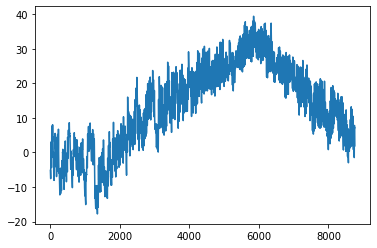

In [125]:
df['Temperature(°C)'].plot()

Observons la répartitions des valeurs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50cf621810>]],
      dtype=object)

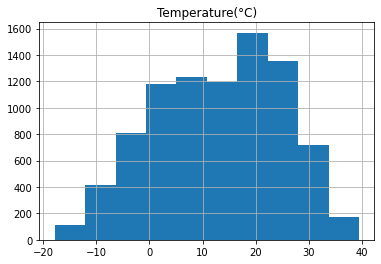

In [127]:
df.hist(column='Temperature(°C)')

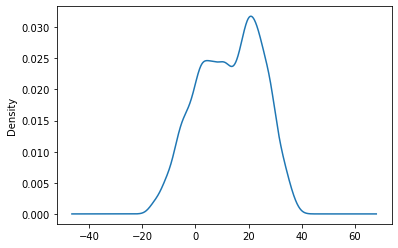

In [128]:
df['Temperature(°C)'].plot.kde()

Soyons plus précis et prenons en compte les saisons

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


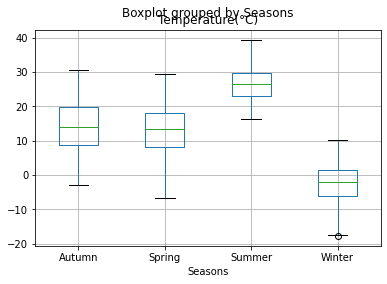

In [130]:
df.boxplot(column='Temperature(°C)',by='Seasons')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50bf30de90>,
      dtype=object)

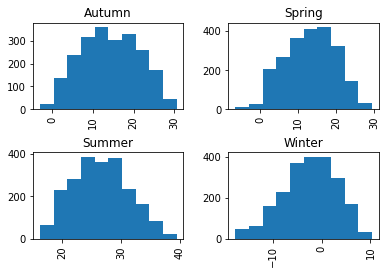

In [131]:
df.hist(column='Temperature(°C)',by='Seasons')

Cherchons à être plus vendeur et moins classique

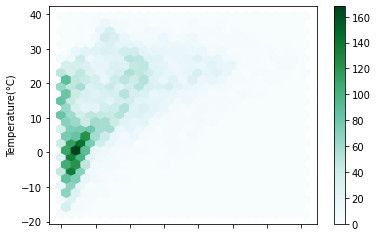

In [135]:
df.plot.hexbin(y='Temperature(°C)',x='Rented Bike Count',gridsize=25)

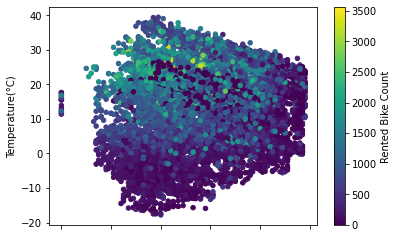

In [138]:
df.plot.scatter(y='Temperature(°C)',x='Humidity(%)',c='Rented Bike Count',colormap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50ba9f1650>,
      dtype=object)

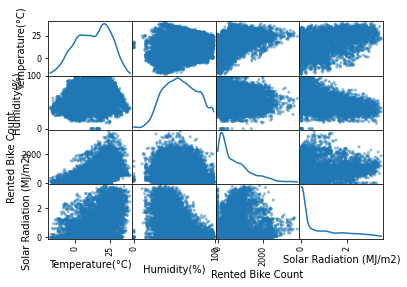

In [142]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Temperature(°C)','Humidity(%)','Rented Bike Count','Solar Radiation (MJ/m2)']],diagonal='kde')

Cette visualisation permet de rapidement repérer les correlation et distribution de valeurs problèmatiques

# IV. A vous de jouer 

Faire une étude détaillé du dataset fournis en copie:

In [143]:
to_study = pd.read_csv("https://raw.githubusercontent.com/njtierney/melb-housing-data/master/data-raw/melbourne_housing_raw.csv")

In [144]:
to_study.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
